In [1]:
include("multi-slices_proposal.jl");

This is figure 1 of the proposal, showing x-y slice of $\epsilon$

In [ ]:

fig1 = Figure(resolution = (1000, 1000), figure_padding=(2,2,2,2), size=(2,1))
axis_kwargs_hm_xy = (xlabel = "cross-slope distance x (km)",
                  ylabel = "along-slope distance y (km)"
                  )
ax_xy = Axis(fig1[1, 1], aspect=.5; xlabelsize=20, ylabelsize=20, titlesize=20,
             title = "log₁₀(ε) (W/kg) at z = 1300 m", axis_kwargs_hm_xy...)


using ColorSchemes
hm_xy = Makie.heatmap!(ax_xy, xC[:]/1e3, yC[:]/1e3, dropdims(log10.(εxy[:,:,:,end]),dims=3),
    colorrange = (-10,-6), colormap = :matter,
    lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
    nan_color=:grey )
contour!(ax_xy, xC[:]/1e3, yC[:]/1e3, z_interp, linewidth = 1.5, color =:black)
lines!(ax_xy,[xC[1]/1e3,15],yC[[Ny÷2,Ny÷2]]/1e3,linewidth=3.5,linestyle=:dash,color=:black)

fig1 


As part of figure 1, the plot shows x-z slice in terms of $\epsilon$

In [ ]:

fig2 = Figure(resolution = (1000, 1000), figure_padding=(5,30,5,5), size=(1,2))
axis_kwargs_hm_xz = (xlabel = "cross-slope distance x (km)",
                  ylabel = "elevation z (m)"
                  )
ax_xz = Axis(fig2[1, 1], aspect=3; xlabelsize=20, ylabelsize=20, titlesize=20,
            title = "log₁₀(ε) (W/kg) and buoyancy contours (B)", axis_kwargs_hm_xz...)

hm_xz = Makie.heatmap!(ax_xz, xC[:]/1e3, zC[:], dropdims(log10.(εxz[:,:,:,end]),dims=2),
    colorrange = (-10,-6), colormap = :matter,
    lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
    nan_color=:grey )
ct_u = contour!(ax_xz, xC[:]/1e3, zC[:],  dropdims(Bxz[:,:,:,end],dims=2),
    levels=0.:.5e-4:4.e-3, linewidth=0.6, color=:black, alpha=0.5)
lines!(ax_xz,xC[[1,Nx]]/1e3,[1300,1300],linewidth=3.5,linestyle=:dash,color=:black)
Colorbar(fig2[1,2], hm_xz, width=7,height = Relative(0.25))
fig2

Revision of Figure 5. This time plot the evolution of the flow in terms of $\epsilon$

In [2]:
ω₀ = 1.4e-4
N = 1e-3
f₀ = -0.53e-4
s_ω₀ = sqrt((ω₀^2-f₀^2)/(N^2-ω₀^2))
s_2ω₀ = sqrt(((2ω₀)^2-f₀^2)/(N^2-(2ω₀)^2))
s_3ω₀ = sqrt(((3ω₀)^2-f₀^2)/(N^2-(3ω₀)^2))
s_4ω₀ = sqrt(((4ω₀)^2-f₀^2)/(N^2-(4ω₀)^2))
xir = [7.5, 15].*1e3
zi = s_ω₀ * xir
xdiff = minimum(zi[:]) - 1000;
zir = s_ω₀ * xir .- xdiff

xil = [0, 7.5].*1e3
zi = -s_ω₀ * xil
xdiff = minimum(zi[:]) - 1000;
zil = -s_ω₀ * xil .- xdiff

xild = [3, 7].*1e3
zi = s_ω₀ * xild
xdiff = minimum(zi[:]) - 410;
zild = s_ω₀ * xild .- xdiff

xi2ω = [7.5, 15].*1e3
zi = 2s_ω₀ * xi2ω
xdiff = minimum(zi[:]) - 1000;
zi2ω = 2s_ω₀ * xi2ω .- xdiff

xi2ωl = [0, 7].*1e3
zi = -2s_ω₀ * xi2ωl
xdiff = minimum(zi[:]) - 1000;
zi2ωl = -2s_ω₀ * xi2ωl .- xdiff

xi3ω = [7.9, 15].*1e3
zi = 3s_ω₀ * xi3ω
xdiff = minimum(zi[:]) - 1000;
zi3ω = 3s_ω₀ * xi3ω .- xdiff

xi3ωl = [0, 7].*1e3
zi = -3s_ω₀ * xi3ωl
xdiff = minimum(zi[:]) - 1000;
zi3ωl = -3s_ω₀ * xi3ωl .- xdiff

xi4ω = [7.6, 15].*1e3
zi = 4s_ω₀ * xi4ω
xdiff = minimum(zi[:]) - 1000;
zi4ω = 4s_ω₀ * xi4ω .- xdiff

xi4ωl = [0, 7.6].*1e3
zi = -4s_ω₀ * xi4ωl
xdiff = minimum(zi[:]) - 1000;
zi4ωl = -4s_ω₀ * xi4ωl .- xdiff


2-element Vector{Float64}:
 4978.416185976174
 1000.0

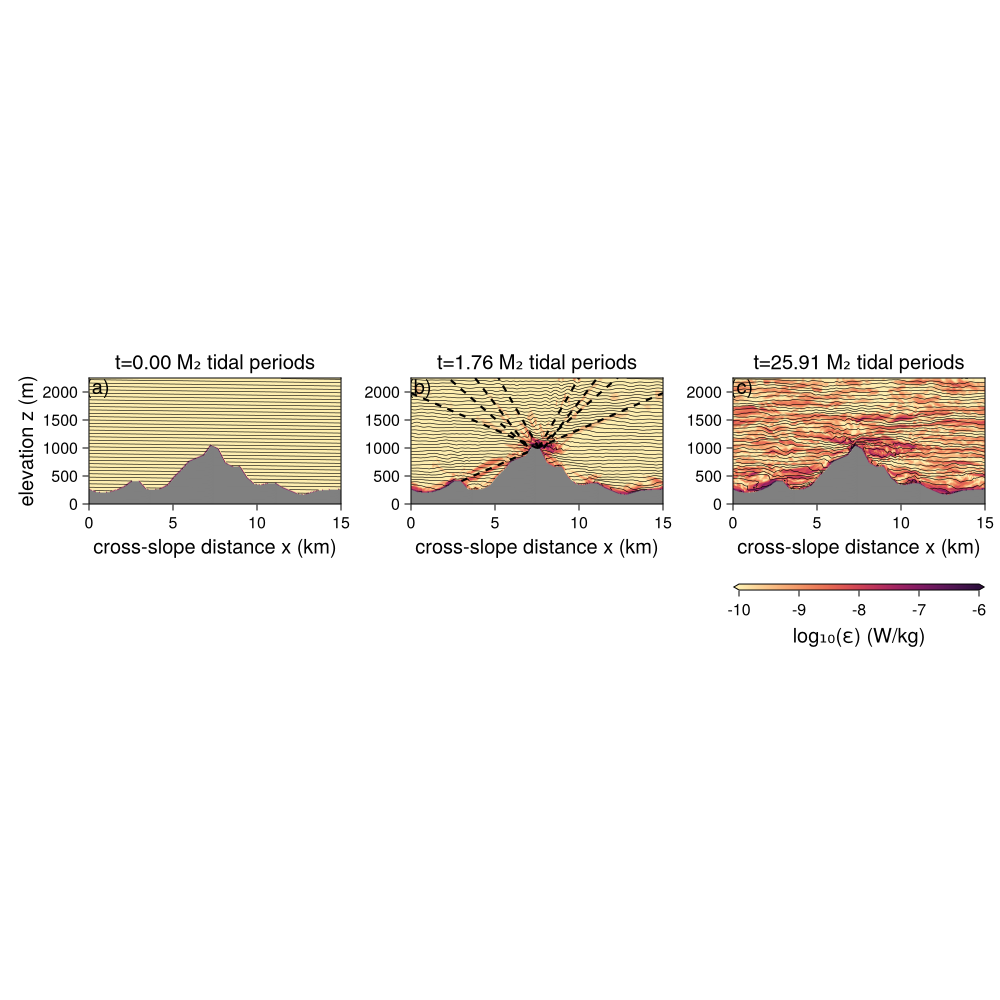

In [25]:
fs=20
fig = Figure(resolution = (1000, 1000), figure_padding=(15,15,15,15), size=(200,100))

ax_xz1 = Axis(fig[1, 1], aspect=2; xlabelsize=20, ylabelsize=20, titlesize=20, titlefont = "Helvetica",
            title = @sprintf("t=%1.2f M₂ tidal periods", t[1]/M₂_period), ylabel = "elevation z (m)",xlabel = "cross-slope distance x (km)")
ax_xz2 = Axis(fig[1, 2], aspect=2; xlabelsize=20, ylabelsize=20, titlesize=20, titlefont = "Helvetica",
            title = @sprintf("t=%1.2f M₂ tidal periods", t[45]/M₂_period), limits=(nothing,(0,2250)),
            yticks=(0:500:2000),xlabel = "cross-slope distance x (km)")
# ax_xz3 = Axis(fig[2, 1], aspect=2; xlabelsize=20, ylabelsize=20, titlesize=20, titlefont = "Helvetica",
#             title = @sprintf("t=%1.2f M₂ tidal periods", t[200]/M₂_period), ylabel = "elevation z (m)",
#             xlabel = "cross-slope distance x (km)")
ax_xz4 = Axis(fig[1, 3], aspect=2; xlabelsize=20, ylabelsize=20, titlesize=20, titlefont = "Helvetica",
            title = @sprintf("t=%1.2f M₂ tidal periods", t[end]/M₂_period), 
            xlabel = "cross-slope distance x (km)")

hm_xz1 = Makie.heatmap!(ax_xz1, xC[:]/1e3, zC[:], dropdims(log10.(εxz[:,:,:,1]),dims=2),
    colorrange = (-10,-6), colormap = :matter,
    lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
    nan_color=:grey )
    ct_u = contour!(ax_xz1, xC[:]/1e3, zC[:],  dropdims(Bxz[:,:,:,1],dims=2),
    levels=0.:.6e-4:4.e-3, linewidth=0.6, color=:black, alpha=0.5)
text!(ax_xz1, "(a)", position = Point2f(.5, 2100), align = (:center, :center), fontsize = fs, color = :black)

hm_xz2 = Makie.heatmap!(ax_xz2, xC[:]/1e3, zC[:], dropdims(log10.(εxz[:,:,:,45]),dims=2),
    colorrange = (-10,-6), colormap = :matter,
    lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
    nan_color=:grey )
    ct_u = contour!(ax_xz2, xC[:]/1e3, zC[:],  dropdims(Bxz[:,:,:,45],dims=2),
    levels=0.:.6e-4:4.e-3, linewidth=0.6, color=:black, alpha=0.5)
lines!(ax_xz2, xir/1e3,zir, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xil/1e3,zil, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xild/1e3,zild, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi2ω/1e3,zi2ω, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi2ωl/1e3,zi2ωl, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi3ω/1e3,zi3ω, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi3ωl/1e3,zi3ωl, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi4ω/1e3,zi4ω, linewidth=2.2, color=:black, linestyle=:dash)
lines!(ax_xz2, xi4ωl/1e3,zi4ωl, linewidth=2.2, color=:black, linestyle=:dash)
text!(ax_xz2, "(b)", position = Point2f(.5, 2100), align = (:center, :center), fontsize = fs, color = :black)

# hm_xz3 = Makie.heatmap!(ax_xz3, xC[:]/1e3, zC[:], dropdims(log10.(εxz[:,:,:,200]),dims=2),
#     colorrange = (-10,-6), colormap = :matter,
#     lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
#     nan_color=:grey )
#     ct_u = contour!(ax_xz3, xC[:]/1e3, zC[:],  dropdims(Bxz[:,:,:,200],dims=2),
#     levels=0.:.5e-4:4.e-3, linewidth=0.6, color=:black, alpha=0.5)
# text!(ax_xz3, "(c)", position = Point2f(.5, 2100), align = (:center, :center), fontsize = fs, color = :black)
hm_xz4 = Makie.heatmap!(ax_xz4, xC[:]/1e3, zC[:], dropdims(log10.(εxz[:,:,:,end]),dims=2),
    colorrange = (-10,-6), colormap = :matter,
    lowclip=cgrad(:matter)[1], highclip=cgrad(:matter)[end],
    nan_color=:grey )
    ct_u = contour!(ax_xz4, xC[:]/1e3, zC[:],  dropdims(Bxz[:,:,:,end],dims=2),
    levels=0.:.6e-4:4.e-3, linewidth=0.6, color=:black, alpha=0.5)
Colorbar(fig[2,3], hm_xz4, width=Relative(1),height = 6, label = "log₁₀(ε) (W/kg)",labelsize = 20, vertical = false,flipaxis = false)
text!(ax_xz4, "(c)", position = Point2f(.5, 2100), align = (:center, :center), fontsize = fs, color = :black)

rowsize!(fig.layout, 1, Aspect(1,.5))
rowsize!(fig.layout, 2, Aspect(1,.05))

save("output/proposal/flow-evolution-eps.png",fig)
# resize_to_layout!(fig)

fig

In [ ]:
close(ds_xy)
close(ds_xz)

Figure about mean slope current including x-z spanwise integrated velocity and height above bottom average profiles

In [2]:
using NCDatasets
using Statistics
file = "output/tilt/TF_avg_0-20.nc"
ds = Dataset(file)
u_avg = ds["u_avg"][:,:]
what_avg = ds["what_avg"][:,:]
hab = ds["new_height"][:]
u_avg_15_20 = dropdims(mean(u_avg[:,30:39],dims=2),dims=2)
what_avg_15_20 = dropdims(mean(what_avg[:,30:39],dims=2),dims=2)

file = "output/notilt/TF_avg_0-20.nc"
ds = Dataset(file)
u_avg = ds["u_avg"][:,:]
what_avg = ds["what_avg"][:,:]

u_avg_15_20_no = dropdims(mean(u_avg[:,30:39],dims=2),dims=2)
what_avg_15_20_no = dropdims(mean(what_avg[:,30:39],dims=2),dims=2)

301-element Vector{Float64}:
  0.0
 -0.0002689799747443024
 -0.0010521634000369006
 -0.0013498095192726043
 -0.0012829686796792033
 -0.0012279086857220722
 -0.0011502024796945234
 -0.0010405719868420307
 -0.0009121172524684569
 -0.0007764785160051885
 -0.0006462053730937688
 -0.0005250050296913516
 -0.0004144414544538581
  ⋮
 -1.9969362805281838e-5
 -2.0122762027497162e-5
 -2.0286277111546128e-5
 -2.050104207548583e-5
 -2.0772057847752447e-5
 -2.1110027263321537e-5
 -2.151183132862884e-5
 -2.1965171062941553e-5
 -2.2484022436096255e-5
 -2.3044970918726007e-5
 -2.3623442669840854e-5
 -2.4247803617084952e-5

In [ ]:

slope = "tilt"
timerange = "0-20"
filename_field = string("output/", slope, "/internal_tide_theta=0.0036_realtopo3D_Nx=500_Nz=250_", timerange, "_threeD_timeavg.nc")
ds_field = Dataset(filename_field,"r")

# grids
zC = ds_field["zC"]; Nz=length(zC[:])
zF = ds_field["zF"]; zF = zF[:];
xC = ds_field["xC"]; Nx=length(xC[:])
xF = ds_field["xF"]; 
yC = ds_field["yC"]; Ny=length(yC[:])
t = ds_field["time"][:];
ti = 30:39    # day 15-20
utemp = 0
for i in 1:length(ti)
        uhat = ds_field["uhat"][:,:,:,ti[i]];    # true u
        what = ds_field["what"][:,:,:,ti[i]];    # true w
        what_cen = (what[:,:,1:end-1] .+ what[:,:,2:end])./2 # what at center
        # piecewise linear interpolation of what_cen from [center,center,center] to [face,center,center]
        wtemp = (vcat(what_cen[end:end,:,:],what_cen[1:end-1,:,:]) .+ what_cen[:,:,:])./2
        θ = 0.0036
        utemp = utemp .+ uhat[:,:,:]*cos(θ) .+ wtemp*sin(θ)
end
u = utemp ./ length(ti);

In [3]:
using MAT
using Interpolations 
using NaNStatistics
# load topography 
topo_file = "topo.mat"
file = matopen(topo_file)
z_topo = read(file, "z_noslope_periodic") 
x_topo = read(file, "x_domain")
y_topo = read(file, "y_domain")
# grids has to be evenly spaced
x_topo_lin = range(x_topo[1],x_topo[end],size(z_topo,1))
y_topo_lin = range(y_topo[1],y_topo[end],size(z_topo,2))
close(file)
# high-resolution grids
x_interp = range(x_topo[1],x_topo[end], length=Nx)
y_interp = range(y_topo[1],y_topo[end], length=Ny)


# Interpolation object (caches coefficients and such)
itp = LinearInterpolation((x_topo_lin, y_topo_lin), z_topo)
# Interpolate z_topo onto a higher-resolution grid
z_interp = [itp(x, y) for x in x_interp, y in y_interp]
z_interp = z_interp.-minimum(z_interp)

# u_y = dropdims(mean(u,dims=2),dims=2);#*(yC[2]-yC[1]);    # integral of u
u[u.==0].=NaN
u_y = dropdims(nansum(u,dims=2),dims=2)*(yC[2]-yC[1]);    # integral of u

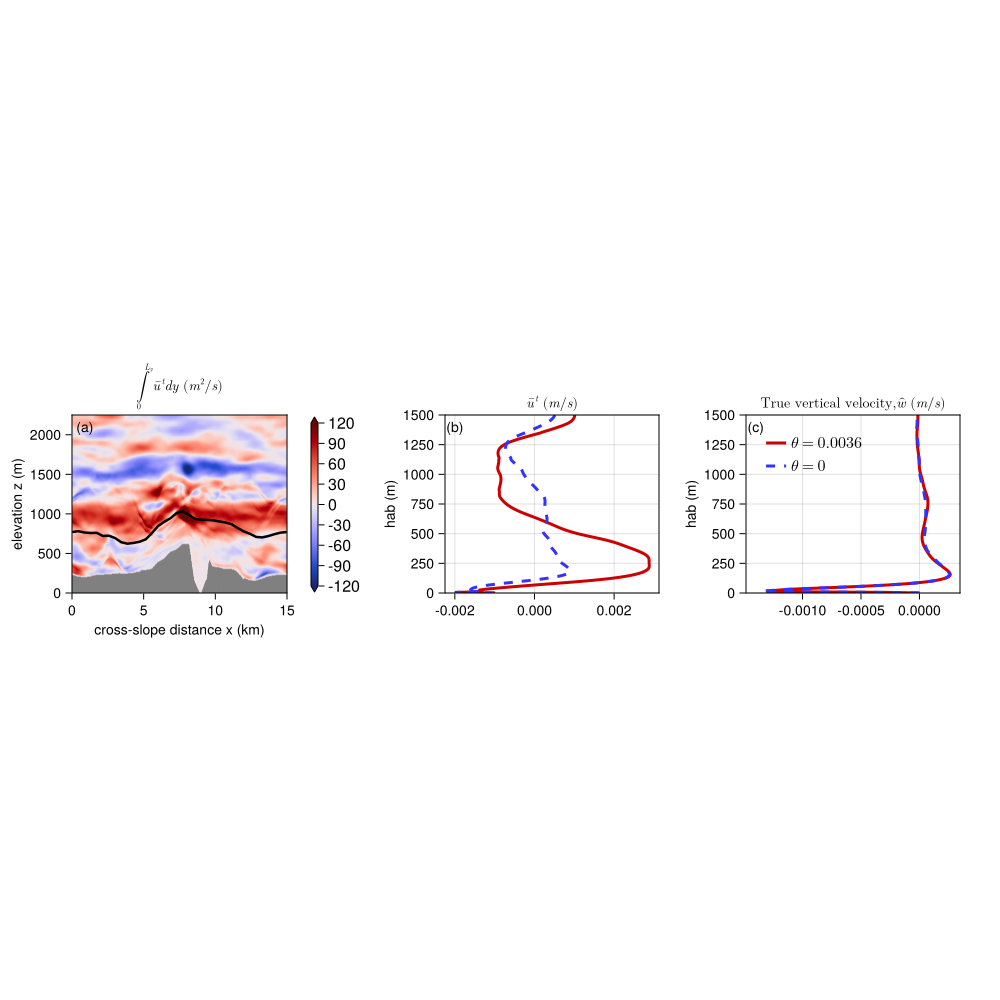

In [23]:
using CairoMakie
u_y[u_y.==0].=NaN
fs=14
fig = Figure(resolution = (1000, 1000), figure_padding=(10, 40, 10, 10), size=(1000,800))
axis_kwargs_hm_xz = (xlabel = "cross-slope distance x (km)",ylabel = "elevation z (m)",
                    titlesize=fs, xticklabelsize=fs, yticklabelsize=fs)
axis_kwargs_ln = (ylabel = "hab (m)",limits = (nothing,(0, 1500)),titlesize=fs, xticklabelsize=fs,
                 yticklabelsize=fs )   
ztick = 0:250:1500
ax_u = Axis(fig[1, 1],aspect=1.2; xlabelsize=fs, ylabelsize=fs, title = L"\int_0^{L_{y}} \bar{u}^t dy ~(m^2/s)", axis_kwargs_hm_xz...)
ax_u_ln = Axis(fig[1, 3],aspect=1.2; xlabelsize=fs, ylabelsize=fs, title = L"\bar{u}^t ~(m/s)", 
                yticks = (ztick, string.(ztick)), axis_kwargs_ln...)
ax_what_ln = Axis(fig[1, 4],aspect=1.2; xlabelsize=fs, ylabelsize=fs, 
                title = L"\text{True vertical velocity}, ŵ~(m/s)", 
                yticks = (ztick, string.(ztick)), axis_kwargs_ln...)

using ColorSchemes
using NaNStatistics
using Statistics
hm_u = heatmap!(ax_u, xC[:]/1e3, zC[:], u_y,
colorrange = (-120,120), colormap = :diverging_bwr_20_95_c54_n256,
lowclip=cgrad(:diverging_bwr_20_95_c54_n256)[1], highclip=cgrad(:diverging_bwr_20_95_c54_n256)[end],
nan_color = :gray)
Colorbar(fig[1,2], hm_u, width=7,height = Relative(.2))
lines!(ax_u, xC[:]/1e3, dropdims(mean(z_interp,dims=2),dims=2),linewidth=2.5,color=:black)
text!(ax_u, "(a)", position = Point2f(.9, 2100), align = (:center, :center), fontsize = fs, color = :black)

lines!(ax_u_ln, u_avg_15_20[:], hab[:], linewidth=3,color=RGBf(204/255,0,0))
lines!(ax_u_ln, u_avg_15_20_no[:], hab[:], linewidth=3,color=RGBf(51/255,51/255,255/255),linestyle=:dash)
text!(ax_u_ln, "(b)", position = Point2f(-.002, 1400), align = (:center, :center), fontsize = fs, color = :black)

ln1=lines!(ax_what_ln, what_avg_15_20[:], hab[:], linewidth=3,color=RGBf(204/255,0,0))
ln2=lines!(ax_what_ln, what_avg_15_20_no[:], hab[:], linewidth=3,color=RGBf(51/255,51/255,255/255),linestyle=:dash)
text!(ax_what_ln, "(c)", position = Point2f(-.0014, 1400), align = (:center, :center), fontsize = fs, color = :black)
axislegend(ax_what_ln, [ln1,ln2],[L"\theta=0.0036",L"\theta=0"], position = :lt, framevisible = false)
fig

In [24]:
save("output/proposal/slope_current.png",fig)

CairoMakie.Screen{IMAGE}
